In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [2]:
df_carat = pd.read_csv("https://raw.githubusercontent.com/artamonoff/econometrica/main/econometrica-1/datasets/diamonds.csv")
df_carat

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


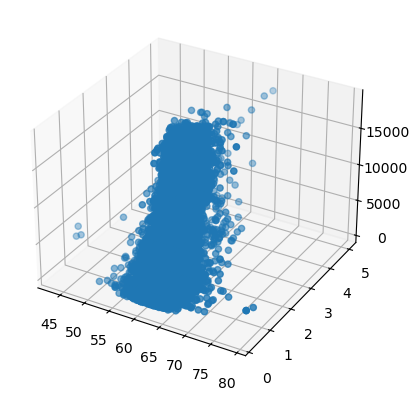

In [4]:
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
ax.scatter (xs = 'depth', ys = 'carat',zs = 'price', data = df_carat)
plt.show()

In [7]:
#Подгоним плоскость 
fitted_plane = smf.ols(formula= 'carat ~ depth + np.cos(price)', data=df_carat).fit()

In [8]:
fitted_plane.params

Intercept        0.221638
depth            0.009333
np.cos(price)    0.007378
dtype: float64

In [9]:
beta0, beta1, beta2 = fitted_plane.params

In [10]:
X= np.arange(start = df_carat ['depth'].min(), stop = df_carat['depth'].max(), step=1)
Y= np.arange(start = df_carat ['price'].min(), stop = df_carat ['price'].max(), step=1)
X,Y = np.meshgrid(X,Y)

In [11]:
Z = beta0 + beta1 * X+ beta2 * Y

<function matplotlib.pyplot.show(close=None, block=None)>

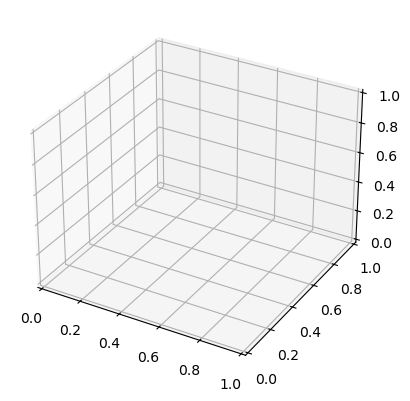

In [12]:
fig.ax = plt.subplots(subplot_kw = {'projection': '3d'})
ax.plot_surface(X,Y,Z, color = 'r', alpha = 0.2)
ax.scatter (zs = 'price', xs = 'depth', ys = 'carat', data = df_carat)
plt.show